In [12]:
import csv
import copy

from rdflib import URIRef, BNode, Literal
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
from rdflib import Namespace
from rdflib import Graph

from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
qudt = Namespace("http://qudt.org/1.1/schema/qudt#")
# cresource = Namespace("http://jresearch.ucd.ie/climate-kg/resource/")
seas = Namespace("https://w3id.org/seas/")
unit = Namespace("http://qudt.org/vocab/unit/")
prov = Namespace("http://www.w3.org/ns/prov#")
car = Namespace("http://jresearch.ucd.ie/climate-kg/resource/")

In [21]:
csvpath = './hd2016.csv'
with open(csvpath) as f:
    csvreader =  csv.reader(f)
    record_head = list(next(csvreader))
    record_rows = list(csvreader)

In [22]:
print(record_head)

['\ufeffutc_timestamp', 'cet_cest_timestamp', 'DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2', 'DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_storage_charge', 'DE_KN_industrial2_storage_decharge', 'DE_KN_industrial3_area_offices', 'DE_KN_industrial3_area_room_1', 'DE_KN_industrial3_area_room_2', 'DE_KN_industrial3_area_room_3', 'DE_KN_industrial3_area_room_4', 'DE_KN_industrial3_compressor', 'DE_KN_industrial3_cooling_aggregate', 'DE_KN_industrial3_cooling_pumps', 'DE_KN_industrial3_dishwasher', 'DE_KN_industrial3_ev', 'DE_KN_industrial3_grid_import', 'DE_KN_industrial3_machine_1', 'DE_KN_industrial3_machine_2', 'DE_KN_industrial3_machine_3', 'DE_KN_industrial3_machine_4', 'DE_KN_industrial3_machine_5', 'DE_KN_industrial3_pv_facade', 'DE_KN_industrial3_pv_roof', 'DE_KN_industrial3_refrigerator', 'DE_KN_industrial3_ventilation', 'DE_KN_public1_grid_import', 'DE_KN_public2_grid_import', 'DE_KN_residential1_dishwasher', 'DE_

In [23]:
def format_uri(*strs):
    uri = strs[0]
    i=1
    while(i>0 and i<len(strs)-1):
        uri += (strs[i]+"_")
        i = i+1
    uri += strs[-1]
    return URIRef(uri)

def ts_mapping_to_rdf(baseuri, header, record, time, graph):
    if record != "":
        header_uri = format_uri(baseuri,header)
        evaluation_uri = format_uri(baseuri,header,time)
        graph.add((evaluation_uri, RDF.type, seas.ElectricPowerEvaluation))
        graph.add((header_uri, seas.evaluation, evaluation_uri))
        graph.add((evaluation_uri,prov.generatedAtTime,Literal(time,datatype=XSD.dateTime)))
        evaluatiion_value_uri = format_uri(baseuri,header,time,"value")
        graph.add((evaluatiion_value_uri, RDF.type, qudt.QuantityValue))
        graph.add((evaluation_uri,seas.evaluatedValue, evaluatiion_value_uri))
        graph.add((evaluatiion_value_uri, qudt.numericalValue, Literal(record,datatype=XSD.float)))
        graph.add((evaluatiion_value_uri, qudt.unit,unit["KiloW-HR"]))

In [27]:
g = Graph()
g.bind("qudt", qudt)
g.bind("unit",unit)
g.bind("rdfs", RDFS)
g.bind("rdf", RDF)
g.bind("seas",seas)
g.bind("car",car)
g.bind("prov",prov)


In [28]:
baseuri = "http://jresearch.ucd.ie/climate-kg/resource/cossmic/"
headers = copy.deepcopy(record_head)
headers.remove('\ufeffutc_timestamp')
headers.remove('cet_cest_timestamp')
headers.remove('interpolated')
print(headers)
for row in record_rows:
    for header in headers:
        ts_mapping_to_rdf(baseuri,header,row[record_head.index(header)],row[record_head.index(record_head[0])],g)
triples = g.serialize(format="turtle").decode("utf-8")

with open('./data.ttl','w') as f:
    f.write(triples)
    

['DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2', 'DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_storage_charge', 'DE_KN_industrial2_storage_decharge', 'DE_KN_industrial3_area_offices', 'DE_KN_industrial3_area_room_1', 'DE_KN_industrial3_area_room_2', 'DE_KN_industrial3_area_room_3', 'DE_KN_industrial3_area_room_4', 'DE_KN_industrial3_compressor', 'DE_KN_industrial3_cooling_aggregate', 'DE_KN_industrial3_cooling_pumps', 'DE_KN_industrial3_dishwasher', 'DE_KN_industrial3_ev', 'DE_KN_industrial3_grid_import', 'DE_KN_industrial3_machine_1', 'DE_KN_industrial3_machine_2', 'DE_KN_industrial3_machine_3', 'DE_KN_industrial3_machine_4', 'DE_KN_industrial3_machine_5', 'DE_KN_industrial3_pv_facade', 'DE_KN_industrial3_pv_roof', 'DE_KN_industrial3_refrigerator', 'DE_KN_industrial3_ventilation', 'DE_KN_public1_grid_import', 'DE_KN_public2_grid_import', 'DE_KN_residential1_dishwasher', 'DE_KN_residential1_freezer', 'DE_KN_residential1

In [78]:
import pandas as pd
import matplotlib.pylab as plt

In [79]:
df = pd.read_csv('./corre-pv-tmax-2.csv')
df.head()

,pv-i,pv-r,TMAX,PRCP
0,2.88,2.709,4.7,0.0
1,4.92,3.161,5.2,12.4
2,4.15,12.490,7.8,7.0
3,4.84,11.060,6.2,1.5
4,6.29,15.100,7.8,0.8


In [80]:
print(df['TMAX'])

0      4.7
1      5.2
2      7.8
3      6.2
4      7.8
      ... 
361    7.0
362    5.1
363    3.3
364    0.7
365   -1.0
Name: TMAX, Length: 366, dtype: float64


Text(0, 0.5, 'Maximum Temperature (centigrade)')

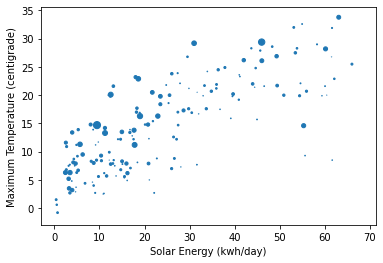

In [82]:
p = df.plot(kind='scatter', x='pv-r', y='TMAX', s=df['PRCP'])
p.set_xlabel("Solar Energy (kwh/day)")
p.set_ylabel("Maximum Temperature (centigrade)")

In [86]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('./corre-pv-tmax-2.csv')
df.head()

,pv-i1,pv-r1,pv-i2,pv-r2,TMAX,PRCP
0,2.88,2.709,1.93,2.172,4.7,0.0
1,4.92,3.161,3.54,2.808,5.2,12.4
2,4.15,12.490,2.99,10.700,7.8,7.0
3,4.84,11.060,3.90,5.082,6.2,1.5
4,6.29,15.100,5.26,8.129,7.8,0.8


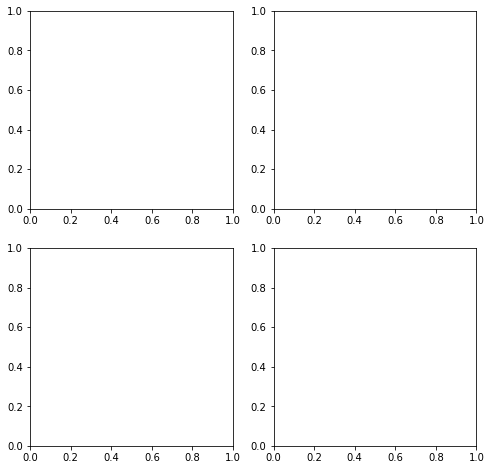

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

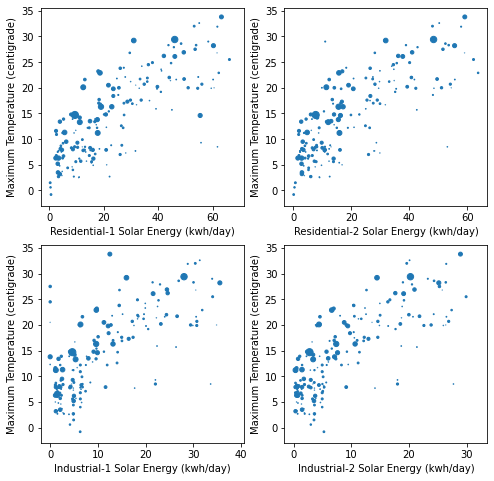

In [94]:
axes[0,0].scatter(x=df['pv-r1'], y=df['TMAX'], s=df['PRCP'])
axes[0,0].set_xlabel("Residential-1 Solar Energy (kwh/day)")
axes[0,0].set_ylabel("Maximum Temperature (centigrade)")
axes[0,1].scatter(x=df['pv-r2'], y=df['TMAX'], s=df['PRCP'])
axes[0,1].set_xlabel("Residential-2 Solar Energy (kwh/day)")
axes[0,1].set_ylabel("Maximum Temperature (centigrade)")
axes[1,0].scatter(x=df['pv-i1'], y=df['TMAX'], s=df['PRCP'])
axes[1,0].set_xlabel("Industrial-1 Solar Energy (kwh/day)")
axes[1,0].set_ylabel("Maximum Temperature (centigrade)")
axes[1,1].scatter(x=df['pv-i2'], y=df['TMAX'], s=df['PRCP'])
axes[1,1].set_xlabel("Industrial-2 Solar Energy (kwh/day)")
axes[1,1].set_ylabel("Maximum Temperature (centigrade)")
fig

In [103]:
dfc = df.corr(method='pearson')
dfc.loc[['TMAX','PRCP'],['pv-r1','pv-r2','pv-i1','pv-i2']]


,pv-r1,pv-r2,pv-i1,pv-i2
TMAX,0.792388,0.782947,0.779747,0.802174
PRCP,-0.190667,-0.164119,-0.140355,-0.124258
